## Setting up metadata for layers of GIS data

In [16]:
from osgeo import ogr, osr

In [17]:
driver = ogr.GetDriverByName('ESRI Shapefile')

In [18]:
dataset = driver.Open("/home/smitesh22/Data/GIS Extracted/N19E072_wgs84/planet_72,19_73,20-shp/shape/", 0)

In [19]:
layer = dataset.GetLayer(0)

layer_types = {
              0:'places',
              1: 'railway',
              2:'landuse',
              3:'natural',
              4:'point',
              5:'waterway',
              6:'road',
              7:'buildings'}

In [20]:
layer_metadata = {}
for num in layer_types:
    layer = dataset.GetLayer(num)
    
    attributes = []
    for feature in layer:
        attributes.append(feature.items())
    meta = set()
    
    for attr in attributes:
        #print(attr['type'])
        meta.add(attr['type'])
        
        
    layer_metadata[layer_types[num]] = meta

In [21]:
layer_metadata['landuse']

{'allotments',
 'aquaculture',
 'barren',
 'basin',
 'brownfield',
 'cemetery',
 'commercial',
 'construction',
 'education',
 'farmland',
 'farmyard',
 'garages',
 'garden',
 'grass',
 'green',
 'greenfield',
 'industrial',
 'landfill',
 'meadow',
 'military',
 'orchard',
 'parking',
 'plant_nursery',
 'quarry',
 'railway',
 'recreation_groun',
 'religious',
 'reservoir',
 'residential',
 'retail',
 'salt_pond',
 'saltpond',
 'used by school a',
 'vacant',
 'village_green',
 'yes'}

### Using metadata to plot

In [22]:
colors = [
    "red", "green", "blue", "yellow", "orange", "purple", "cyan", "magenta", "pink", "brown",
    "gray", "black", "white", "teal", "lime", "gold", "indigo", "maroon", "olive", "navy",
    "orchid", "salmon", "turquoise", "violet", "coral", "crimson", "chocolate", "darkgreen", "darkorange",
    "darkblue", "darkred", "darkviolet", "deeppink", "forestgreen", "hotpink", "khaki", "lightblue", "lightgreen",
    "lightcoral", "limegreen", "mediumvioletred", "mediumseagreen", "mediumslateblue", "mediumpurple", "mediumturquoise",
    "orangered", "royalblue", "saddlebrown", "seagreen", "sienna", "slateblue", "springgreen"
]


In [23]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefile into a GeoDataFrame
shapefile_path = "/home/smitesh22/Data/GIS Extracted/N19E072_wgs84/planet_72,19_73,20-shp/shape/buildings.shp"
gdf = gpd.read_file(shapefile_path)

In [24]:
landuse_colors = {}
for i, land_type in enumerate(list(set(gdf['type']))):
    landuse_colors[land_type] = colors[i]


IndexError: list index out of range

In [10]:
def get_buffered_area_map(shapefile_path):
    gdf = gpd.read_file(shapefile_path)
    
    # Buffer the geometries with a distance of 100 meters

    gdf = gdf.to_crs("EPSG:3857")

    buffer_distance = 1000  # in meters
    gdf_buffered = gdf.copy()
    gdf_buffered["geometry"] = gdf_buffered.geometry.buffer(buffer_distance)

    # Plot the original land use areas and the buffered areas on the same plot
    fig, ax = plt.subplots(figsize=(50, 50))

    # Plot the land use areas with different colors based on the land use type

    for land_use_type, group in gdf.groupby("type"):
        group.plot(ax=ax, color=landuse_colors[land_use_type], label=land_use_type)

    # Plot the buffered areas with a single color
    gdf_buffered.plot(ax=ax, color="yellow", alpha=0.5, label="Buffered Area")

    plt.title("Land Use Areas with 100-Meter Buffer")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.legend()
    plt.show()

/tmp/ipykernel_31619/378108970.py:26: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


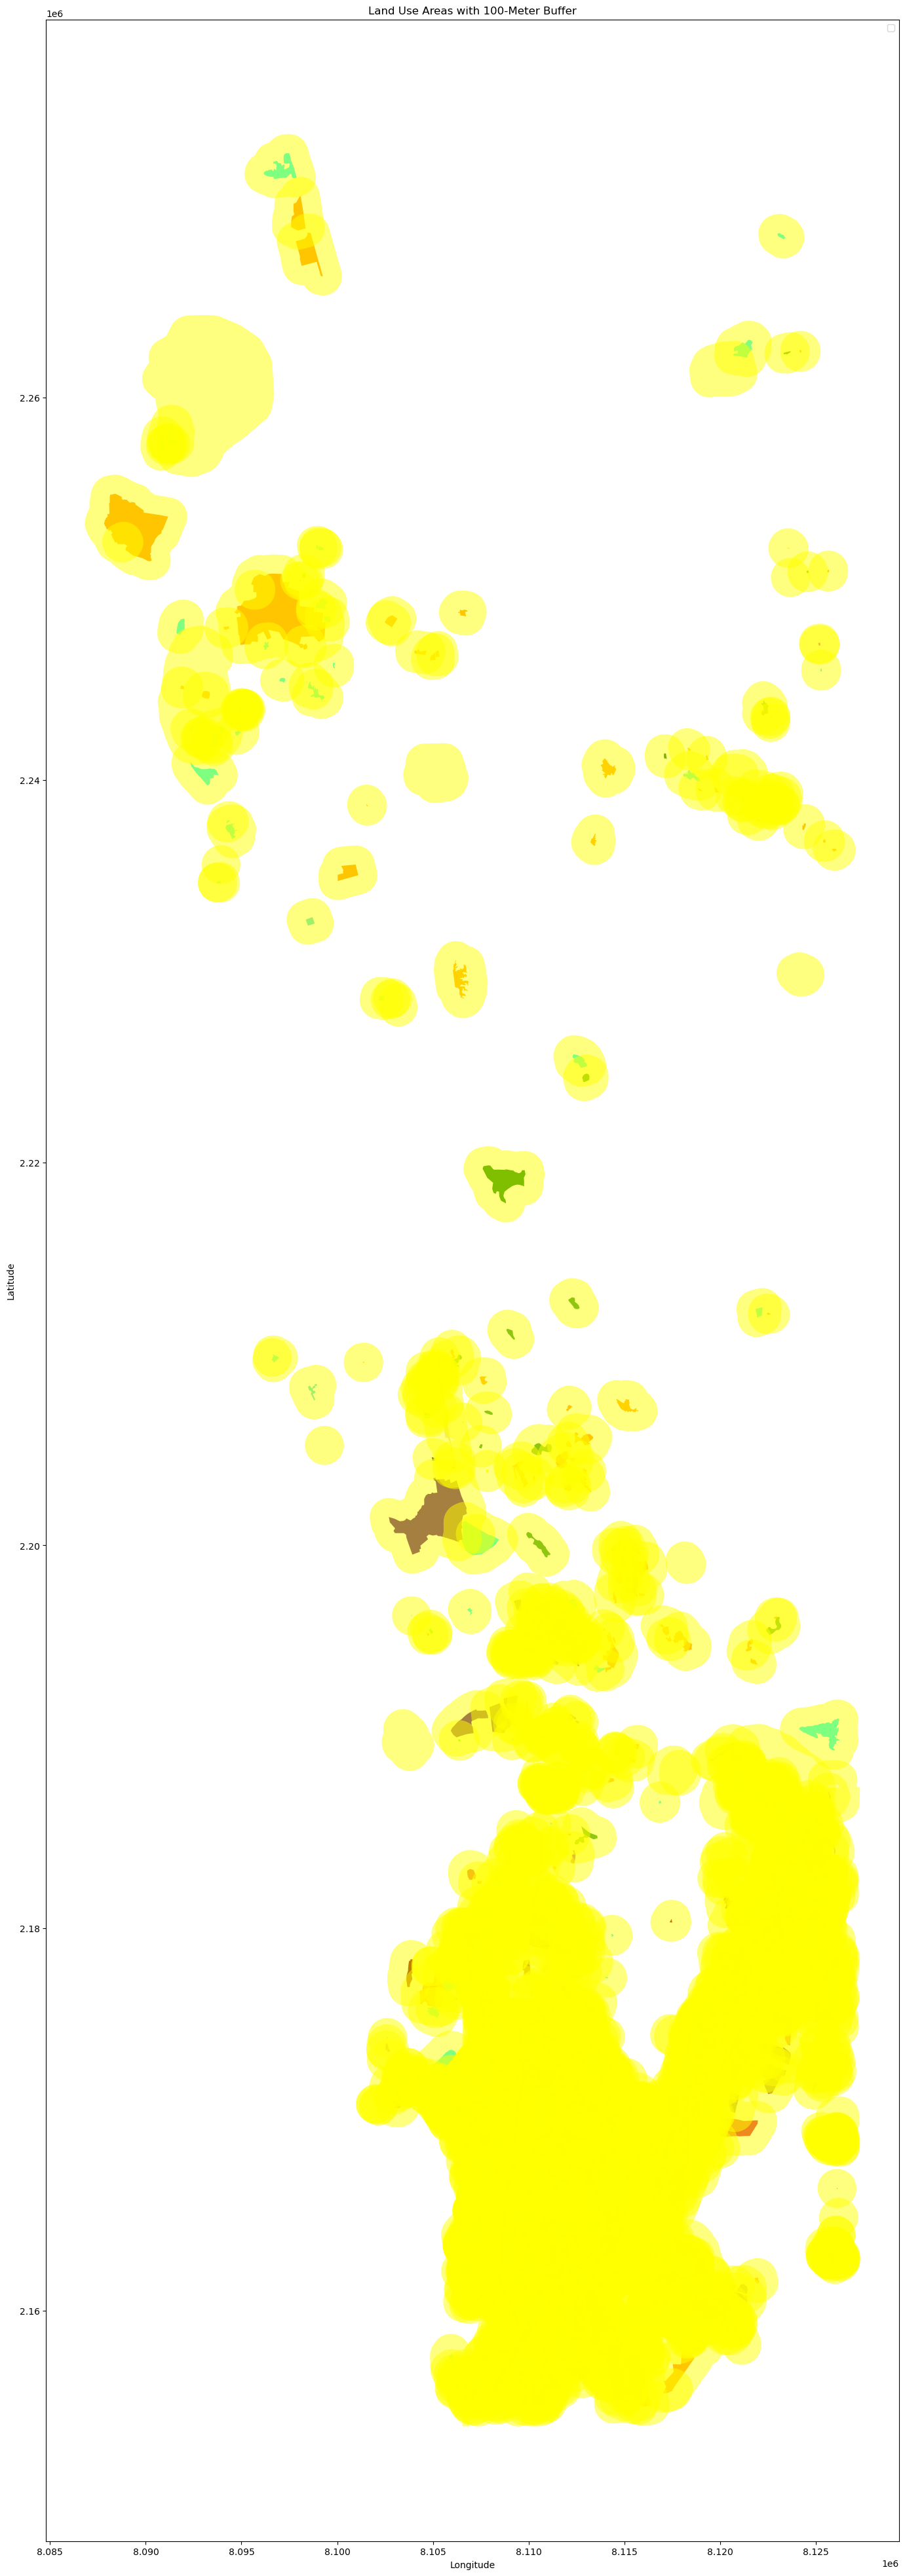

In [11]:
get_buffered_area_map("/home/smitesh22/Data/GIS Extracted/N19E072_wgs84/planet_72,19_73,20-shp/shape/landuse.shp")

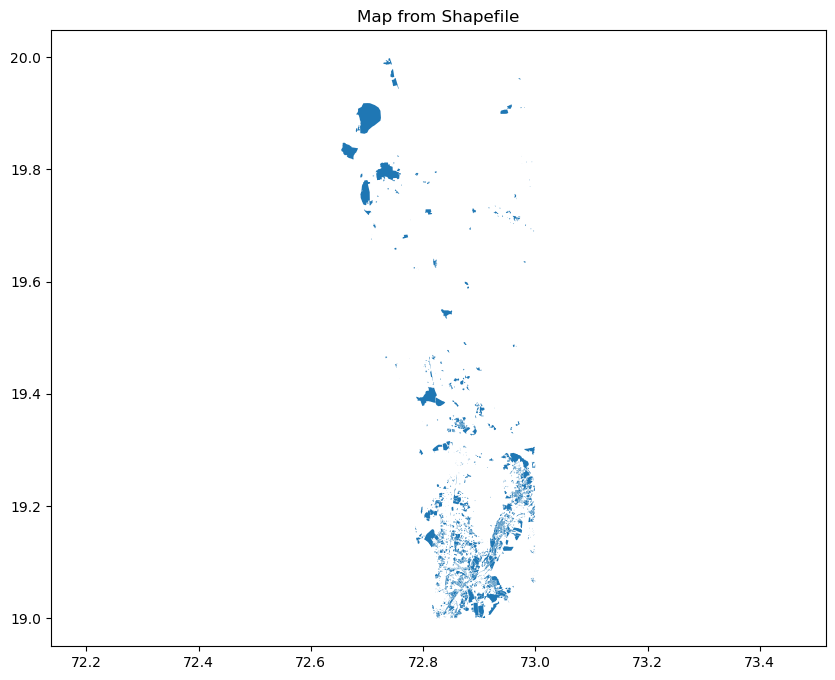

In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefile into a GeoDataFrame
shapefile_path = "/home/smitesh22/Data/GIS Extracted/N19E072_wgs84/planet_72,19_73,20-shp/shape/landuse.shp"
gdf = gpd.read_file(shapefile_path)



# Plot the map
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(ax=ax)
plt.title("Map from Shapefile")
plt.axis("equal")  # To ensure the aspect ratio is correct
plt.show()


/tmp/ipykernel_31619/1179817873.py:8: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


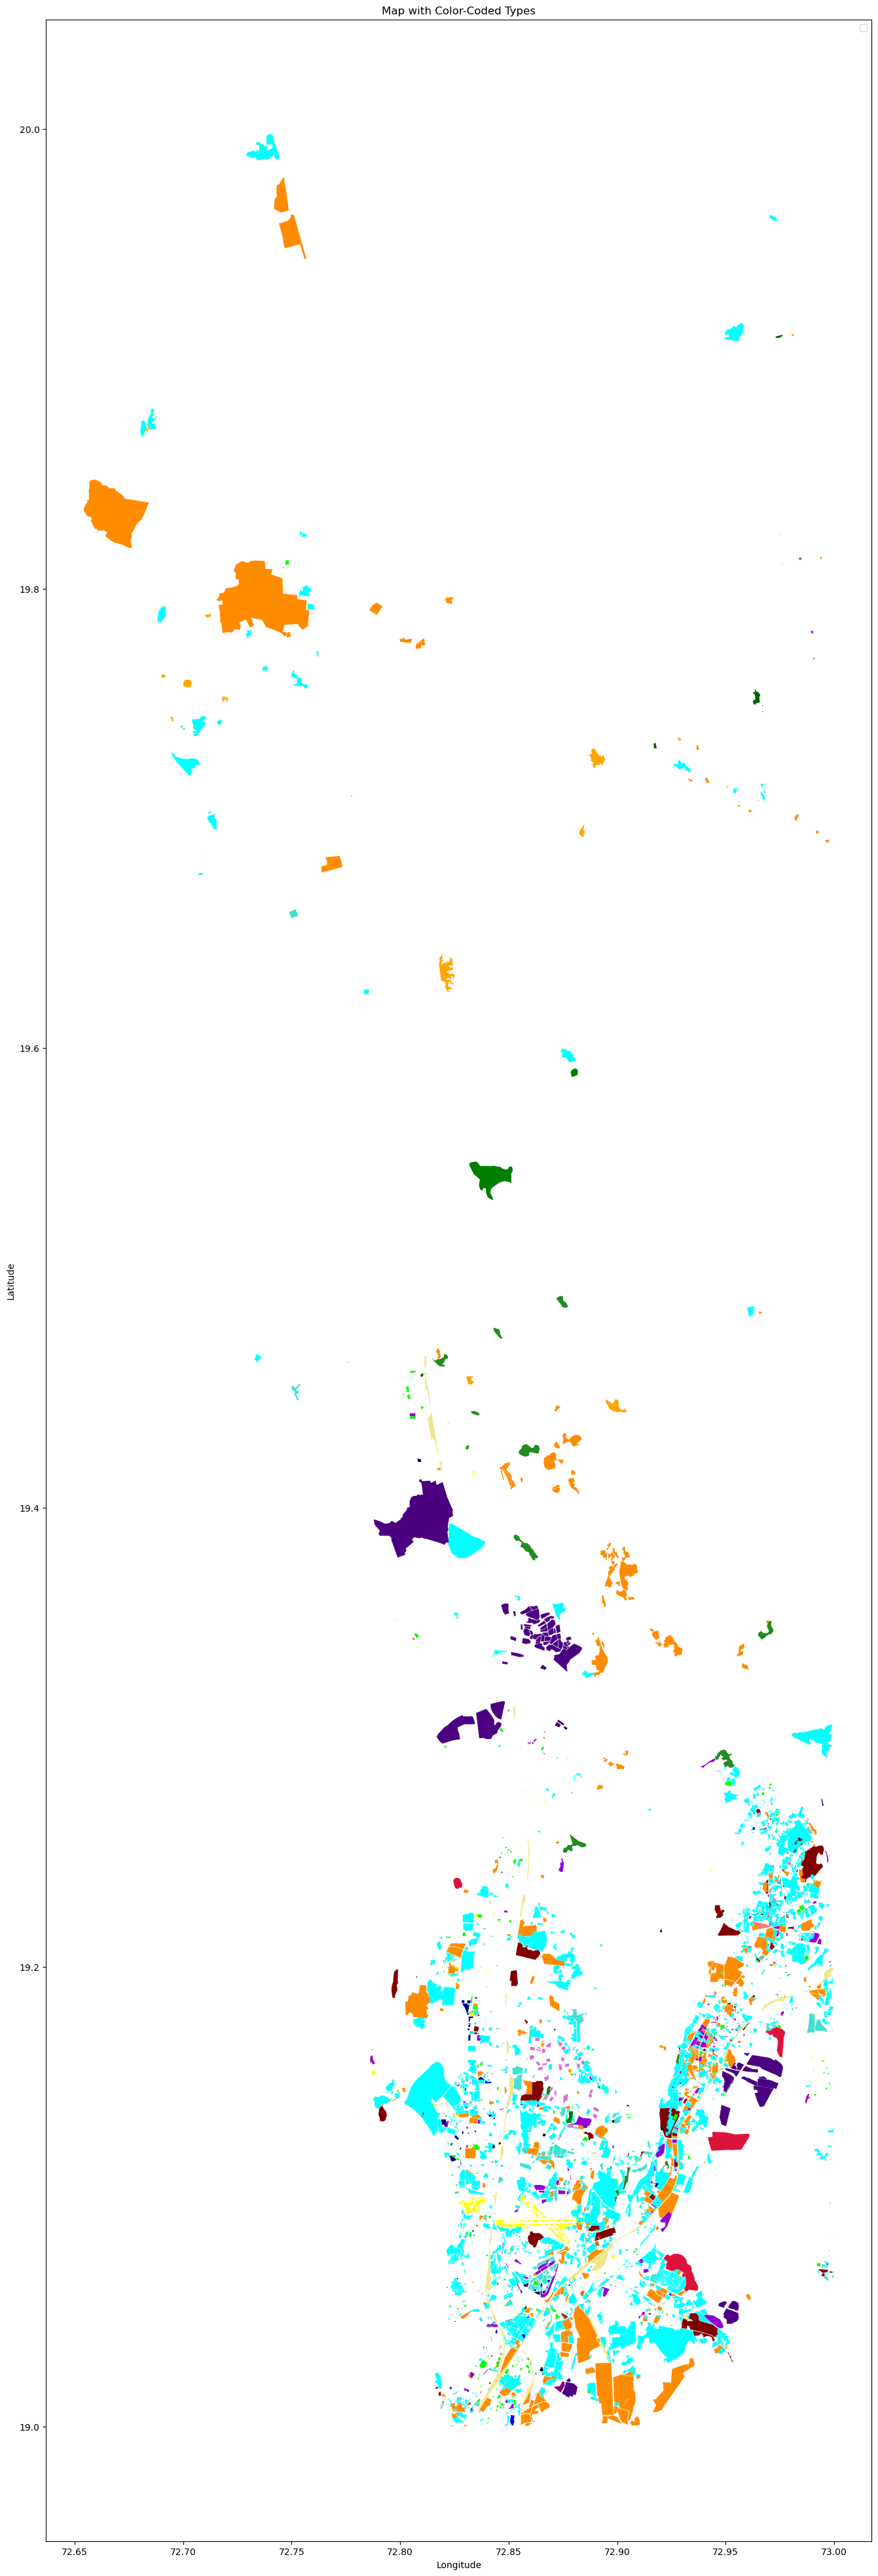

In [13]:
fig, ax = plt.subplots(figsize=(50, 50))
for layer_name, group in gdf.groupby("type"):
    group.plot(ax=ax, color=landuse_colors[layer_name], label=layer_name)

plt.title("Map with Color-Coded Types")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()

/tmp/ipykernel_31619/2760569823.py:23: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


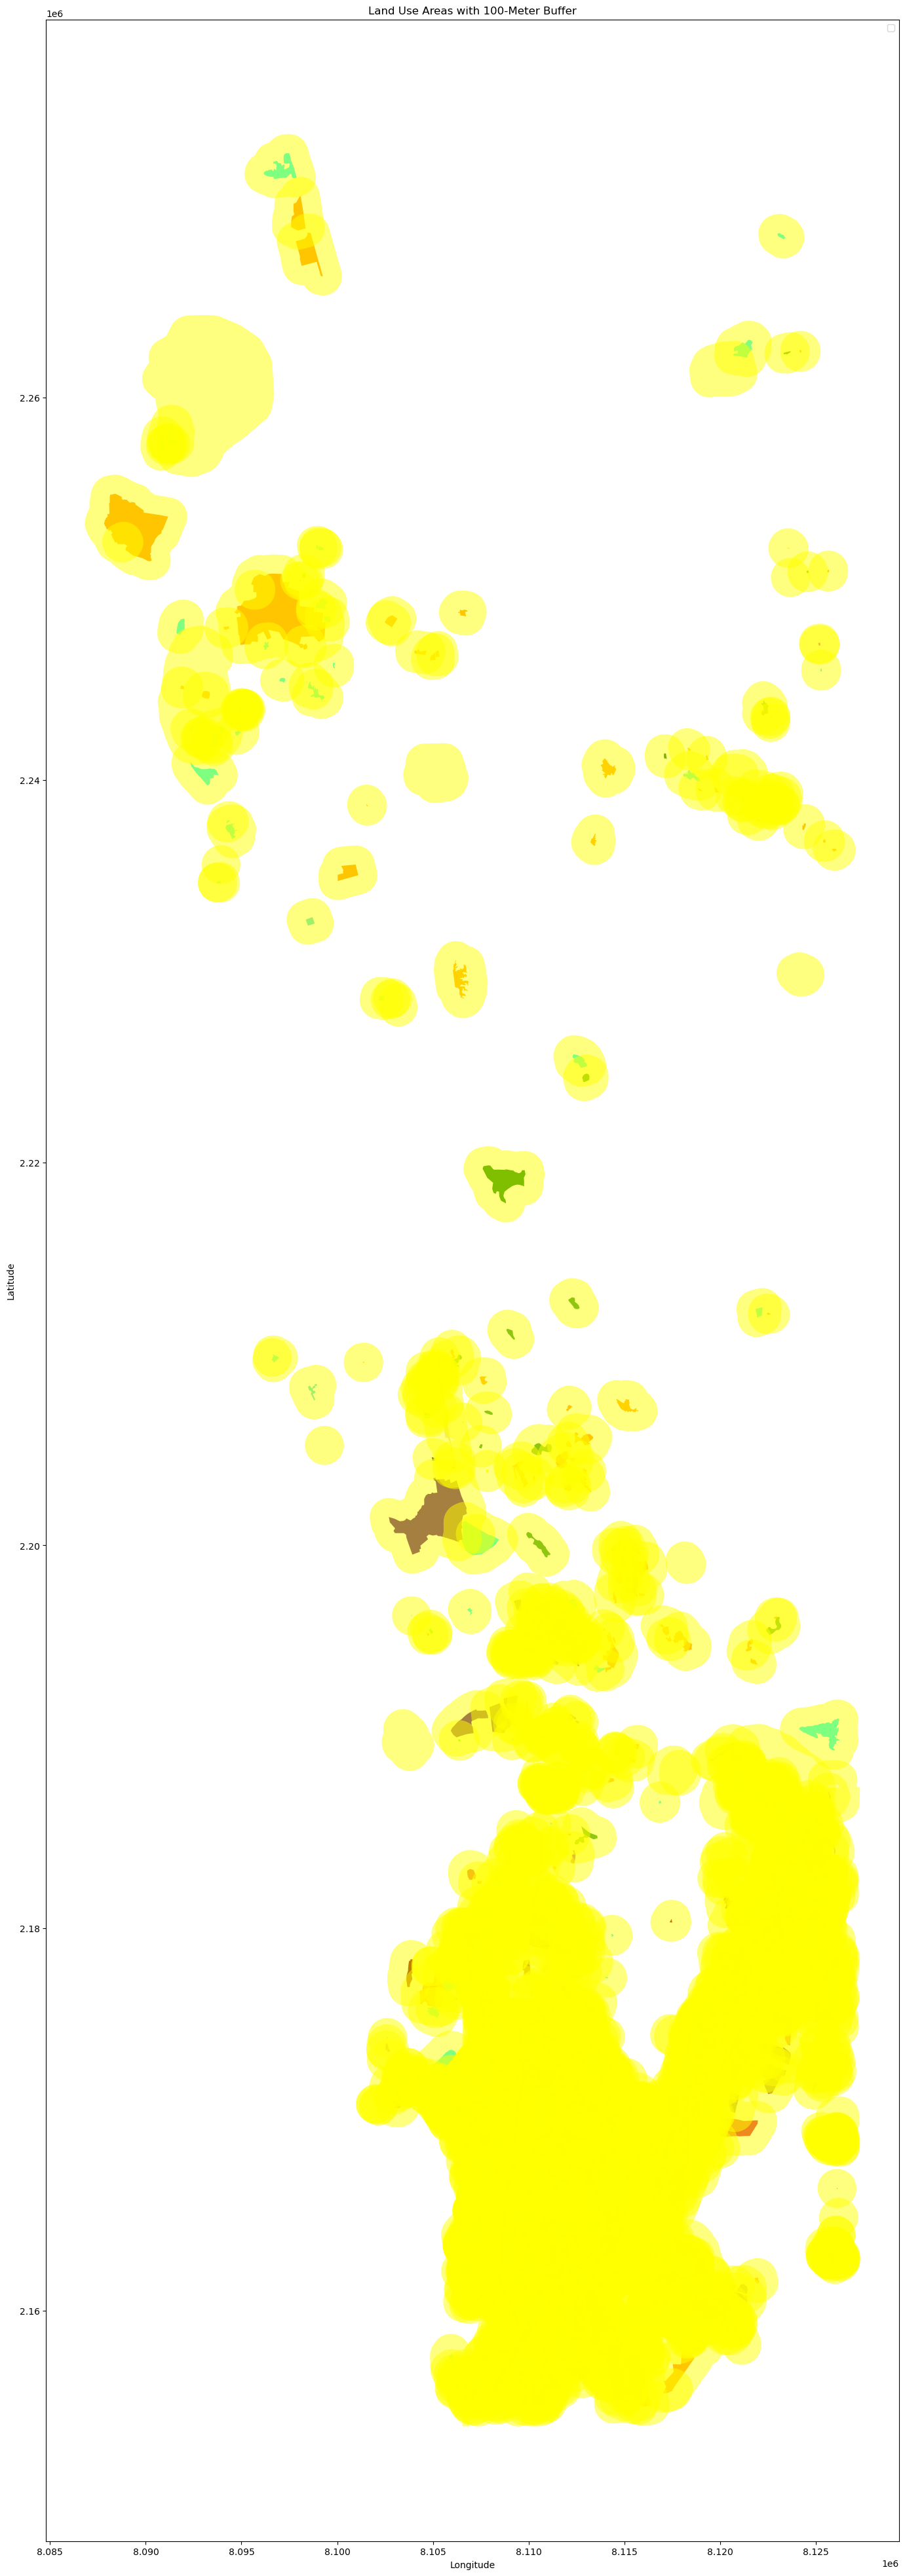

In [14]:
# Buffer the geometries with a distance of 100 meters

gdf = gdf.to_crs("EPSG:3857")

buffer_distance = 1000  # in meters
gdf_buffered = gdf.copy()
gdf_buffered["geometry"] = gdf_buffered.geometry.buffer(buffer_distance)

# Plot the original land use areas and the buffered areas on the same plot
fig, ax = plt.subplots(figsize=(50, 50))

# Plot the land use areas with different colors based on the land use type

for land_use_type, group in gdf.groupby("type"):
    group.plot(ax=ax, color=landuse_colors[land_use_type], label=land_use_type)

# Plot the buffered areas with a single color
gdf_buffered.plot(ax=ax, color="yellow", alpha=0.5, label="Buffered Area")

plt.title("Land Use Areas with 100-Meter Buffer")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()


In [15]:
layer_metadata

{'places': {'borough',
  'city',
  'farm',
  'hamlet',
  'island',
  'locality',
  'neighbourhood',
  'plot',
  'suburb',
  'town',
  'village',
  'yes'},
 'railway': {'abandoned',
  'construction',
  'disused',
  'miniature',
  'monorail',
  'platform',
  'platform_edge',
  'proposed',
  'rail',
  'subway',
  'traverser',
  'turntable',
  'workshop'},
 'landuse': {'allotments',
  'aquaculture',
  'barren',
  'basin',
  'brownfield',
  'cemetery',
  'commercial',
  'construction',
  'education',
  'farmland',
  'farmyard',
  'garages',
  'garden',
  'grass',
  'green',
  'greenfield',
  'industrial',
  'landfill',
  'meadow',
  'military',
  'orchard',
  'parking',
  'plant_nursery',
  'quarry',
  'railway',
  'recreation_groun',
  'religious',
  'reservoir',
  'residential',
  'retail',
  'salt_pond',
  'saltpond',
  'used by school a',
  'vacant',
  'village_green',
  'yes'},
 'natural': {'forest', 'park', 'water'},
 'point': {'Drinking Water F',
  'The Wall',
  'animal_boarding',
  